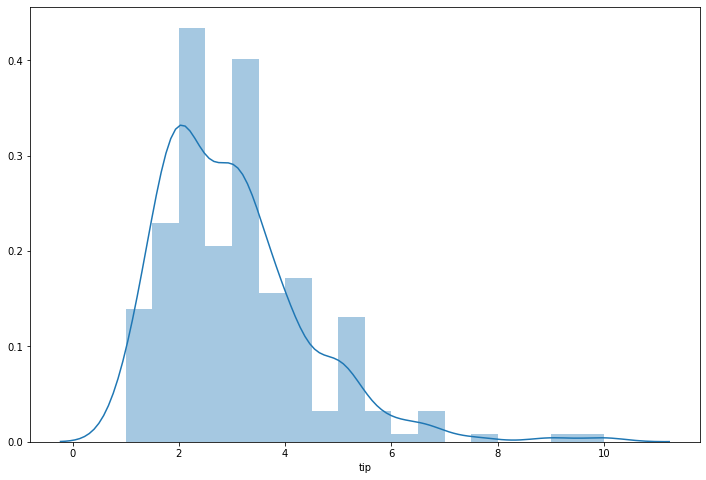

In [4]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

tips = sns.load_dataset('tips')

from sklearn.model_selection import train_test_split
X = tips.drop('tip', axis = 1)
y = tips['tip']

from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
X['sex'] = lb.fit_transform(X['sex'])
X['smoker'] = lb.fit_transform(X['smoker'])
X['day'] = lb.fit_transform(X['day'])
X['time'] = lb.fit_transform(X['time'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)
X.head()

sns.distplot((y))

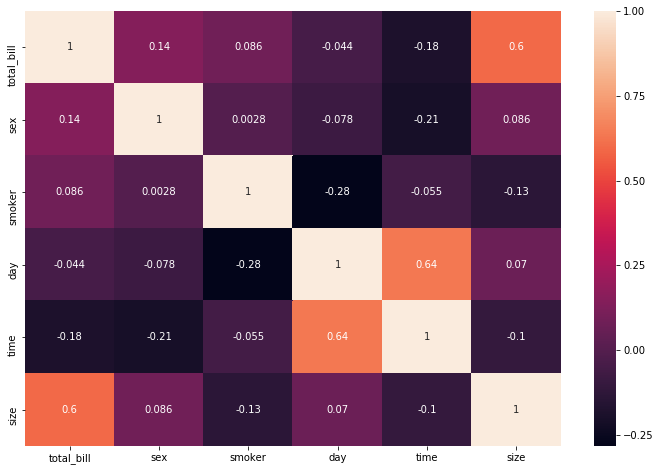

In [5]:
plt.rc("figure", figsize = (12, 8))
sns.heatmap(X.corr(), annot = True)

In [6]:
from sklearn.ensemble import GradientBoostingRegressor
est = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=20, random_state=0, loss='ls').fit(X_train, y_train)
y_pred = est.predict(X_test)

(0, 15)

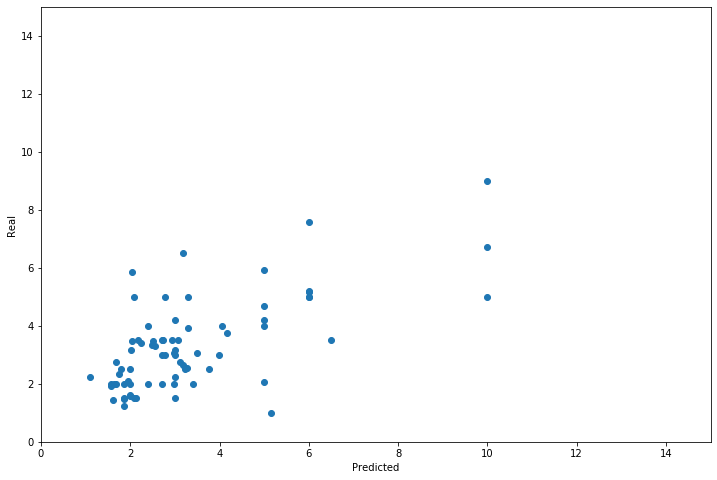

In [7]:
figure, axes = plt.subplots()
axes.scatter(y_pred, y_test)
axes.set_xlabel("Predicted")
axes.set_ylabel("Real")
axes.set_xlim([0, 15])
axes.set_ylim([0, 15])

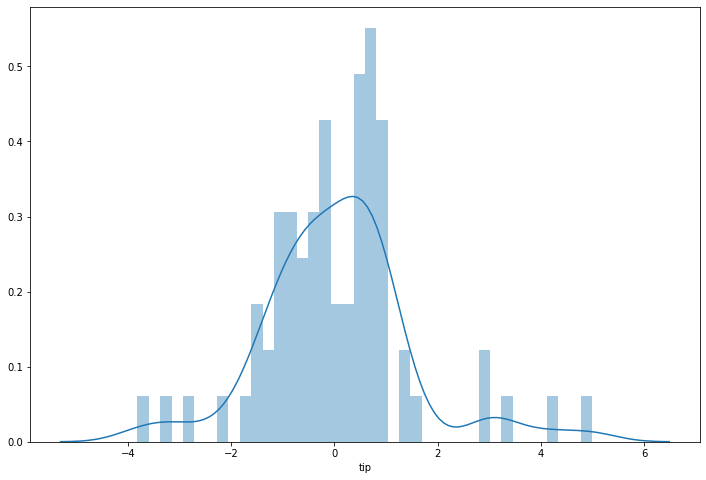

In [8]:
sns.distplot((y_pred - y_test), bins = 40)